# Outils d'optimisation pour les sciences des données et de la décision - Contrôle continu

#Julien VU

# Master 2 ID 2020-2021

## Date de rendu : 22 janvier 2021

## Modalités de rendu

- Ce notebook est à rendre **individuellement**. Votre rendu devra comporter vos nom et prénom(s). Les réponses aux différentes questions devront être incorporées au notebook, et la partie pratique devra pouvoir être exécutée par l'enseignant.

- Votre version du notebook est à envoyer par mail à l'adresse clement.royer@dauphine.psl.eu. La date limite est fixée au **22 janvier 2021**.

## Ressources utiles

- *La version la plus récente de ce notebook se trouve dans l'onglet* Fichiers *de l'équipe Teams associée au cours, ou sur [ce lien](https://www.lamsade.dauphine.fr/~croyer/ensdocs/ODD/ODD-CC.ipynb).*

- *Le polycopié de cours est disponible [ici](https://www.lamsade.dauphine.fr/~croyer/ensdocs/ODD/PolyODD.pdf).*

- *Ce notebook utilise LaTeX pour la partie mathématiques.* ***Le bloc ci-dessous devra être executé pour permettre d'éditer le notebook de la même manière qu'un document LaTeX (en permettant, notamment, aux équations d'être numérotées et référencées dans le même bloc).***

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

- Des macros LaTeX sont définies ci-dessous (mais n'apparaissent plus une fois le bloc exécuté). N'hésitez pas à incorporer vos propres macros !

$$
\newcommand{\E}[1]{\operatorname{\mathbb{E}}\left[#1\right]}
\DeclareMathOperator*{\argmin}{\text{argmin}}
\def\R{{\mathbb{R}}}
\def\vz{{\mathbf{z}}}
\def\vy{{\mathbf{y}}}
\def\vx{{\mathbf{x}}}
\def\vw{{\mathbf{w}}}
\def\vv{{\mathbf{v}}}
\def\vu{{\mathbf{u}}}
\def\vq{{\mathbf{q}}}
\def\ve{{\mathbf{e}}}
\def\va{{\mathbf{a}}}
\def\mX{{\mathbf{X}}}
\def\mQ{{\mathbf{Q}}}
\def\calC{{\mathcal{C}}}
\def\setB{{\mathcal{B}}}
\newcommand{\T}{\mathrm{T}}
$$

### Notations

- Dans la suite, $d$ et $n$ désigneront toujours des entiers supérieurs ou égaux à 1.
- Pour tout vecteur $\vw \in \R^d$, le $i$-ème coefficient de $\vw$ sera noté $[\vw]_i$.

# Sujet du notebook : Algorithmes de descente par coordonnées

Les méthodes de descente par coordonnées (ou *coordinate descent* en anglais) sont une classe d'algorithmes qui a connu un regain d'intérêt avec l'arrivée des problèmes de traitement de données massives, pour lesquels il peut être trop coûteux d'agir sur toutes les variables simultanément. Si ces approches sont parmi les plus anciennes, elles ont été revisitées au cours des deux dernières décennies et sont toujours un sujet de recherche actif.

Le but de ce notebook est donc de servir d'introduction aux méthodes de descente par coordonnées, dans un contexte générique mais aussi adapté à l'optimisation *parcimonieuse* ou creuse, pour laquelle on cherche des solutions possédant le plus de coefficients nuls possible.

# Partie I - Bases des méthodes de descente par coordonnées

Pour introduire le principe des méthodes de descente par coordonnées, on considère un problème générique de la forme 
$$
    \min_{\vw \in \R^d} f(\vw),
$$
où la fonction $f$ est supposée convexe et de classe $\calC^1$.
 
Un algorithme de descente par coordonnées part d'un point $\vw_0 \in \R^d$; à chaque itération $k$, la méthode choisit un indice $i_k \in \{1,\dots,d\}$, une taille de pas $\alpha_k>0$, et effectue l'itération suivante :
\begin{equation}
\label{eq:dcit} 
    \vw_{k+1} := \vw_k - \alpha_k \nabla_{i_k} f(\vw_k) \ve_{i_k},
\end{equation}
où $\nabla_{i_k}$ est une notation qui désigne la dérivée partielle par rapport à la $i_k$-ème coordonnée, càd 
$\nabla_{i_k} f(\vw) = [\nabla f(\vw)]_{i_k}$ pour tout $\vw \in \R^d$, et $\ve_{i_k}$ désigne le $i_k$-ème vecteur de la base canonique de $\R^d$.

Le but intrinsèque d'une telle méthode est donc de ramener la résolution d'un problème en $d$ dimensions à celle d'une suite de problèmes en une dimension, en modifiant une coordonnée à la fois. Dans le cas général, il ne suffira pas de faire $d$ itérations pour obtenir la convergence, en revanche des propriétés telles que la séparabilité permettent de garantir la pertinence d'un tel procédé.

## I - A) Propriétés élémentaires

**Question 1** On peut réécrire l'itération \eqref{eq:dcit} comme $\vw_{k+1}:=\vw_k+c_k \ve_{i_k}$, où
\begin{equation}
\label{eq:dcitpb}
    c_k = \argmin_{c \in \R}\ q_k(c), \quad \mbox{avec} \quad q_k(c):=\nabla_{i_k} f(\vw_k) (c-[\vw_k]_{i_k}) 
    + \frac{1}{2\alpha_k}(c-[\vw_k]_{i_k})^2.
\end{equation}

**1-a)** Justifier que ce problème est fortement convexe, et donner la valeur explicite de $c_k$. 

**1-b)** À quel principe algorithmique vu en cours pouvez-vous relier la caractérisation \eqref{eq:dcitpb} ?

**Question 2** Une des hypothèses classiques d'analyse de ce genre de méthodes consiste à supposer que le gradient de $f$ est lipschitzien selon chaque coordonnée, c'est-à-dire qu'il existe $d$ réels positifs $L_1,\dots,L_d$ tels que
$$
    \forall i=1,\dots,d,\ \forall (\vw,\vv) \in (\R^d)^2, 
    \quad \left| \nabla_i f(\vw) - \nabla_i f(\vv) \right| 
    \le L_i \|\vw-\vv\|.
$$
On peut alors définir la *constante de Lipschitz par coordonnées* $L_{\max}:= \max_{1 \le i \le d} L_i$.
Justifier que si le gradient $\nabla f$ est $L$-lipschitzien, alors $L_{\max} >= \frac{L}{d}$.

**Question 3** Par analogie avec les approches de type descente de gradient, pourquoi peut-on envisager le choix de taille de pas $\alpha_k = \frac{1}{L_{i_k}}$ à l'itération $k$ de l'algorithme ? Quel serait l'intérêt de choisir ce pas plutôt que $\frac{1}{L}$, comme vu en cours, ou que $\frac{1}{L_{\max}}$ ?
 

## *Réponses de la partie I - A)*

*Votre réponse à la question 1*

*1-a)* On sait que la fonction $f$ est supposée convexe et de classe $\calC^1$. De plus, on sait qu'à l'itération $k$: 
$w_{k+1}$:=$w_{k}$+$c_{k}$$e_{ik}$ ,
$c_{k}$=argmin pour(c∈$R$) $q_{k}(c)$,avec $qk(c)$:=$\nabla_{ik}f(wk)(c−$w_{k}$i_{k}$)+12 $\alpha_{k}$ (c −  $w_{k}$$ i_{k}$)^2.
On a donc une inégalité stricte:
f($w_{k+1}$)> f($w_k$i_{k}$)+$\nabla $ f($w_{k}$ $i_{k}$)T(c−w_{k} $i_{k}). 
Par la définition d'une fonction $f$ fortement convexe vue en cours, alors $f$ est fortement convexe.

c_k est obtenu lorsque \nabla_{i_k} f(\vw_k)=0

Donc:

$c_{k}$=(1/2) $\alpha_{k}$*(c−$w_{k}$  $i_{k}$)^2


*1-b)* La caractérisation nous rappelle l'utilisation de l'algorithme de gradient stochastique. On choisit un $i_k$ dans notre ensemble de jeu de données. D'autre part, en cours, on a vu que on peut traiter des données par mini-batch c'est à dire qu'on a pris un $i_k$ de telle sorte que $i_k$ soit plus grande que 1 mais reste très inférieur à n(taille du jeu de données).

*Votre réponse à la question 2*

∀i=1,…,d, ∀(w,v)∈($R^{d}$)^2,     |$\nabla_{i}$ f(w)−$\nabla_{i}$ f(v)|≤$L_{i}$ ||w−v||.

D'après la question 1, $f$ est strictement convexe sur d. 

Donc la fonction $f$ admet un unique minimiseur global $w*$ sur d.

Cela implique que pour tout i compris entre 1 et d:

∀(w,v)∈($R^{d}$)^2  ,  |$\nabla_{i}$ f(w)−$\nabla_{i}$ f(v)|≤$ L_{max}$||w−v||  avec $L_{max}$=max $L_{i}$  
De plus, le gradient de $f$ est borné sur d ( d'après les propriétés de $f$) et que 1/d <= 1 pour d>=1.
Par conséquent, on obtient donc:
$L_{max}$ >=L et L >= L/d  pour tout i compris entre 1 et d.
Par transitivité de l'inégalité,  our d>=1, on a l'inégalité suivante:
$L_{max}$>=L/d 




*Votre réponse à la question 3*

On prend une taille de pas constante pour d itérations qui nous garantit une convergence ni trop rapide ni trop lente de la fonction f et à la diminution de la fonction objective f.
On ne connait pas nécessairement L . Une telle information n’est pas forcément aisée à obtenir en pratique. A propos de L_max, ce choix peut conduire à un arrêt prématuré de l’algorithme en pratique. 



## I - B) Variantes aléatoires

On considère maintenant des variantes de la descente par coordonnées basée sur une sélection aléatoire des coordonnées.

Dans la suite de cette partie, on supposera que l'on a accès aux constantes de Lipschitz selon chaque coordonnée, notées $\{L_i\}_{i=1}^d$. On considère alors la variante de descente par coordonnée où un indice $i_k$ est tiré ***uniformément au hasard*** dans $\{1,\dots,d\}$, puis le nouvel itéré est calculé comme précédemment via l'itération 
$$
        \vw_{k+1} := \vw_k - \frac{\nabla_{i_k} f(\vw_k)}{L_{i_k}} \, \ve_{i_k},
$$
où l'on choisit $\frac{1}{L_{i_k}}$ comme taille de pas.


## Questions de la partie I - B)

**Question 4** Dans cette question, on suppose que la fonction $f$ (en plus d'être convexe) possède une unique solution $\vw^* \in \R^d$ et on note $f^* = f(\vw^*)$. Pour tout $\epsilon>0$, on peut alors montrer que l'algorithme de descente par coordonnées converge vers un itéré $\vw_k$ tel que 
$$
    \E{\vw_k} - f^* \le \epsilon 
$$
en au plus
$$
    \frac{2 d L_{\max} \|\vw_0-\vw^*\|^2}{\epsilon}
$$
itérations. Comparer ce résultat avec celui d'une descente de gradient sur le même problème en utilisant un pas $\frac{1}{L}$, avec $L$ une constante de Lipschitz pour $\nabla f$.


**Question 5** Il existe un algorithme qui combine la descente par coordonnées randomisée et l'accélération de 
Nesterov. Partant de $\mathbf{w}_0 \in \mathbb{R}^d$ et $\mathbf{v}_0=\mathbf{w}_0$, l'algorithme tire à chaque itération $k$ un indice $i_k$ uniformément au hasard entre $1$ et $d$, puis effectue la récursion :
\begin{equation}
\label{eq:nesterovcd}
    \left\{ 
        \begin{array}{lll}
            \vu_k &:= &\lambda_k \vv_k + (1-\lambda_k) \vw_k \\
            \vw_{k+1} &:= &\vu_k - \frac{1}{L_{i_k}} \nabla_{i_k} f(\vu_k) \ve_{i_k} \\
            \vv_{k+1} &:= &\mu_k \vv_k + (1-\mu_k) \vu_k - \frac{\gamma_k}{L_{i_k}}\nabla_{i_k} f(\vu) \ve_{i_k},
        \end{array}
    \right.
\end{equation}
où $\{\lambda_k,\mu_k,\gamma_k\}$ sont des suites de réels déterminés en fonction de $d$ (voire de la constante de convexité forte si $f$ est fortement convexe).

Cet algorithme obtient une meilleure complexité en $\mathcal{O}(\frac{1}{k^2})$. En observant l'itération \eqref{eq:nesterovcd}, quel inconvénient pratique décelez-vous dans ces récursions ?

**Question 6** Avec la stratégie "randomisée" décrite dans cette section, l'algorithme de descente par coordonnées rappelle l'algorithme du gradient stochastique. Il existe de fait une connection forte entre ces deux méthodes. Pour l'illustrer, on considère le problème aux moindres carrés linéaires
\begin{equation}
\label{eq:ermsg}
    \min_{\vv \in \R^d} \frac{1}{2d} \left\|\mQ \vv -\vy \right\|^2 = \frac{1}{2d} \sum_{i=1}^d (\vq_i^\T \vv - [\vy]_i)^2,
\end{equation}
où $\mQ = \left[ \begin{array}{c} \vq_1^\T \\ \vdots \\ \vq_d^\T \end{array} \right]$ est une matrice orthogonale, c'est-à-dire inversible avec $\mQ^\T = \mQ^{-1}$. Résoudre le problème \eqref{eq:ermsg} est alors équivalent à résoudre le problème
\begin{equation}
\label{eq:ermcd}
    \min_{\vw \in \R^d} \frac{1}{2} \left\|\vw -\vy \right\|^2 = \frac{1}{2} \sum_{i=1}^d ([\vw]_i - [\vy]_i)^2,
\end{equation}
où $\vz = \mQ^\T \vy$.

Montrer qu'une itération du gradient stochastique appliqué à \eqref{eq:ermsg} et une itération de la descente par coordonnées randomisée appliquée à \eqref{eq:ermcd} avec la même taille de pas et le même tirage d'indice sont équivalentes, dans le sens où si $\vv_k = \mQ^\T \vw_k$, alors $\vv_{k+1}=\mQ^\T \vw_{k+1}$.

## *Réponses de la partie I - B)*

*réponse question 4*
Avec $L$ qui est une constante dont la valeur est bien connue,il y a une garantie de convergence de l'algorithme. Par contre, l'algorithme convergera moins rapidement par rapport à $L_k$. Une convergence moins rapide engendre un coût moindre en terme de mémoire. 

*réponse question 5*
On peut se retrouver avec une convergence beaucoup trop rapide de la fonction $f$ car on pourra se retrouver avec des pas de plus en plus petits lorsque $k$ devient suffisamment grand.


*Réponse question 6*
On sait que d'après la question 5:
\begin{equation}
\label{eq:nesterovcd}
    \left\{ 
        \begin{array}{lll}
            \vu_k &= &\lambda_k \vv_k + (1-\lambda_k) \vw_k \\ et  
            \vw_{k+1} &= &\vu_k - \frac{1}{L_{i_k}} \nabla_{i_k} f(\vu_k) \ve_{i_k} ,
        \end{array}
    \right.

En injectant l'expression de $u_k$ dans celle de $w_{k+1}$, on a alors:

$w_{k+1}$= $\lambda_k$ $v_k$ + (1 - $\lambda_k$)$w_k$ -  (1/$L_{ik}$)$\nabla_{i_k}f(w_k)$ $e_{ik}$

Ensuite, on obtient:

$w_{k+1}$= $\lambda_k$ $v_k$ + $w_k$ - $\lambda_k$ $v_k$ - (1/$L_{ik}$)$\nabla_{i_k}f(w_k)$ $e_{ik}$

Il nous reste alors:

$w_{k+1}$=$w_k$ - (1/$L_{ik}$)$\nabla_{i_k}f(w_k)$ $e_{ik}$

En posant 	$\alpha_{k}$= 1/$L_{ik}$, on peut dire qu'on retrouve l'itération de descente de coordonnées vu lors de la partie 1 i.e:

$w_{k+1}$=$w_k$ - $\alpha_{k}$$\nabla_{i_k}f(w_k)$ $e_{ik}$









# PARTIE II - Descente par coordonnées et optimisation parcimonieuse

Dans cette partie, on étudie l'intérêt des méthodes de descente par coordonnées pour les problèmes de la forme
$$
    \min_{\vw \in \R^d} f(\vw) + \lambda \Omega(\vw),
$$
où $f$ sera une fonction de classe $\calC^1$, $\lambda>0$ et $\Omega$ est un terme de régularisation. On supposera que $\Omega$ possède une structure dite séparable, c'est-à-dire qu'il existe une fonction $h:[0,\infty) \rightarrow [0,\infty)$ telle que
$$
    \forall \vw \in \R^d, \quad \Omega(\vw) = \sum_{i=1}^d h(\left|[\vw]_i \right|).
$$
L'exemple classique d'une telle fonction est la fonction $h(t):=t$, qui conduit à une régularisation en norme $\ell_1$ de la forme $\Omega(\vw):=\|\vw\|_1$, avec $\|\vw\|_1 := \sum_{i=1}^d |[\vw]_i|$. On se concentrera sur ce choix dans ce notebook pour montrer l'intérêt des méthodes de descente par coordonnées, mais on notera que les idées majeures présentées ci-dessous s'étendent à d'autres régularisations de la forme pré-citée.


## II - A) Un problème unidimensionnel

On considère le problème
$$
    \min_{w \in \mathbb{R}}\ f_1(w), \quad \mbox{avec} \quad f_1(w):= a (w-u) +  \frac{L}{2} (w-u)^2 + \lambda |w|,
$$
où $a,u \in \mathbb{R}$, $L>0$, et $\lambda \ge 0$.

## Questions de la partie II - A)

**Question 7** Montrer que ce problème est fortement convexe.

**Question 8** On rappelle que la fonction $f_1$ est continue mais non dérivable partout. Comme vu en cours, son *sous-différentiel* est décrit par:
$$
    \partial f_1(w) := \left\{
        \begin{array}{ll}
            a + L(w-u) + \lambda &\mbox{si $w>0$}\\
            a + L(w-u) -\lambda &\mbox{si $w<0$} \\
            [a + L(w-u)-\lambda,a + L(w-u)+\lambda] &\mbox{si $w=0$.}
        \end{array}
    \right.
$$
Ainsi, le minimum global de $\min_{w \in \mathbb{R}} f_1(w)$, noté $w^*$, est caractérisé par la condition 
$$ 
    0 \in \partial f_1(w^*).
$$

En utilisant ce sous-différentiel, montrer que $w^*$ est donné par
$$
    w^* = \left\{
        \begin{array}{ll}
            u-\tfrac{a}{L} - \tfrac{\lambda}{L} &\mbox{si $u-\tfrac{a}{L} > \lambda$} \\
            u-\tfrac{a}{L} + \tfrac{\lambda}{L} &\mbox{si $u-\tfrac{a}{L} < -\lambda$} \\
            0 &\mbox{si $u-\tfrac{a}{L} \in [-\tfrac{\lambda}{L},\tfrac{\lambda}{L}]$.}
        \end{array}
    \right.
$$

## *Réponses de la partie II - A)*

*Votre réponse à la question 7*

$\nabla$ $f_1(w)$ = a+L(w-u)+$\lambda$

La dérivée seconde de $f_1$ s'écrit alors:
        \begin{array}{ll}
      \nabla^2 f_1(w)=L 
        \end{array}
Or L>0 par hypothèse du problème.
D'après la condition suffisante du second ordre vu en cours, la dérivée seconde est strictement positive. Donc la fonction est fortement convexe.





*Votre réponse à la question 8*

Si w>0,on a: 
      \begin{array}{ll}
            a + L(w^*-u) + \lambda=0 &\mbox{si $w*>0$}\\
      \end{array}
En mettant de l'autre membre de l'égalité lambda , a et en divisant par L, on obtient:
        \begin{array}{ll}
              w^*-u=-\lambda/L-a/L &\mbox{si $w*>0$}\\
        \end{array}
Donc:
        \begin{array}{ll}
              w^*=u-a/L-\lambda/L &\mbox{si $w>0$} donc &\mbox{si $u-a/L>\tfrac{\lambda}{L}$}\\
        \end{array}
Si w<0,on a: 
      \begin{array}{ll}
            a + L(w^*-u) - \lambda=0 &\mbox{si $w>0$}\\
      \end{array}
En mettant de l'autre membre de l'égalité lambda , a et en divisant par L, on obtient:
        \begin{array}{ll}
              w^*-u=+\lambda/L-a/L &\mbox{si $w>0$}\\
        \end{array}
Donc:
        \begin{array}{ll}
              w^*=u-a/L+\lambda/L &\mbox{si $w>0$} donc &\mbox{si $u-a/L<-\tfrac{\lambda}{L}$}\\
        \end{array}


Si w=0,
On a: 
      \begin{array}{ll}
            a + L(w^*-u) + \lambda=a + L(w^*-u) - \lambda 
      \end{array}
Donc:
      \begin{array}{ll}
            w^*=0
      \end{array}



## II-B) Cas général et descente de coordonnées par blocs

On considère maintenant un problème de type LASSO, aussi appelé problème de poursuite de base (de l'anglais *basis pursuit*) en traitement du signal. Pour un jeu de données formé par une matrice $\mX \in \R^{n \times d}$ et un vecteur $\vy \in \R^d$, ce problème s'écrit
\begin{equation}
\label{eq:basispursuit}
    \min_{\vw \in \R^d} f(\vw)+ \lambda \|\vw_1\|, \quad \mbox{avec} \quad
    f(\vw):= \frac{1}{2 n} \|\vy - \mX \vw \|^2.
\end{equation}
Il s'agit donc d'un problème avec régularisation $\ell_1$. Pour le résoudre, nous allons utiliser une approche par blocs de coordonnées, dans laquelle nous utiliserons un bloc $\setB_k \subset \{1,\dots,d\}$ de coordonnées tiré uniformément au hasard à chaque itération. Le nouveau point sera ainsi déterminé en résolvant le sous-problème
\begin{equation}
\label{eq:coord}
    \vw_{k+1} \in \argmin_{\vw} f_{\setB_k}(\vw):= f(\vw_k) + \sum_{i \in \setB_k} \left\{ 
    \left([\vw]_i-[\vw_k]_i\right) \nabla_i f(\vw_k)+ \frac{L_i}{2} \left([\vw]_i-[\vw_k]_i\right)^2 
    + \lambda \left| [\vw_i] \right| \right\},
\end{equation}
où $L_{i_k}$ représente la constante de Lipschitz correspondant à la $i_k$-ème coordonnée, que l'on suppose connue comme en partie I-B).

## Questions de la partie II - B)


**Question 9**  On cherche à implémenter l'algorithme ci-dessus.

**9-a)** En utilisant le résultat de la partie II-A), justifier que le nouvel itéré de l'algorithme de descente coordonnées par blocs est donné par
\begin{equation}
\label{eq:bcdup}
    \forall i \in \{1,\dots,d\}, \quad 
    [\vw_{k+1}]_i = \left\{
    \begin{array}{ll}
        [\vw_k]_i &\mbox{si $i \notin \setB_k$} \\
        [\vw_k]_i - \tfrac{1}{L_i} \nabla_i f(\vw_k) - \tfrac{\lambda}{L_i} &\mbox{si $i \in \setB_k$ et } 
        [\vw_k]_i - \tfrac{1}{L_i} \nabla_i f(\vw_k) > \tfrac{\lambda}{L_i} \\
        [\vw_k]_i - \tfrac{1}{L_i} \nabla_i f(\vw_k) + \tfrac{\lambda}{L_i} &\mbox{si $i \in \setB_k$ et } 
        [\vw_k]_i - \tfrac{1}{L_i} \nabla_i f(\vw_k) < - \tfrac{\lambda}{L_i} \\
        0 &\mbox{sinon.}
    \end{array}
    \right.
\end{equation}

**9-b)** Si on choisit tous les $L_i$ égaux, à quel algorithme vu en cours correspond la variante par blocs pour laquelle $|\setB| = n$ ?

**Question 10** Compléter le code-ci-dessous pour implémenter un algorithme de descente par coordonnées randomisé adapté au problème \eqref{eq:basispursuit} en utilisant la formule \eqref{eq:bcdup}. Tester ensuite plusieurs valeurs de blocs de coordonnées en utilisant le script fourni, et commenter vos résultats.


## *Réponses aux questions de la partie II - B)*
**Réponse 9.A**

En se basant sur les réponses à la partie 2.A on a :

$$
    w^* = \left\{
        \begin{array}{ll}
            u-\tfrac{a}{L} - \tfrac{\lambda}{L} &\mbox{si $u-\tfrac{a}{L} > \tfrac{\lambda}{L}$} \\
            u-\tfrac{a}{L} + \tfrac{\lambda}{L} &\mbox{si $u-\tfrac{a}{L} < \tfrac{\lambda}{L}$} \\
            0 &\mbox{si $u-\tfrac{a}{L} \in [-\tfrac{\lambda}{L},\tfrac{\lambda}{L}]$.}
        \end{array}
    \right.
$$

Cela se traduit en étudiant 4 conditions différentes afin de parvenir au résultat final:

Si $i \notin \setB_k$, alors on se retrouve dans le cas ou le problème de régularisation $l_{1}$ ne contient pas de bloc $B_{k}$. 

Ainsi, le terme à l'intérieur de la somme des $B_{k}$ est nulle.
Donc $w_{k+1}${i}= 0 pour $i \notin \setB_k$.


Si $i \in \setB_k$ et que $w_{k}$_{i} - (1/$L_{i}$) $\nabla_{i} f($w_{k}$) > (\lambda / $L_{i}$) alors on se retrouve dans le cas (2) ci-dessus car c'est compatible avec les propriétés des deux problèmes vus dans les deux parties.
Donc:

$w_{k+1}$=[$w_k$]_i - (1/$L_{i}$) $\nabla_{i} f($w_{k}$) - (\lambda/$L_{i}$)


Si $i \in \setB_k$ et que $w_{k}$_{i} - (1/$L_{i}$ $\nabla_{i} f($w_{k}$) < $\lambda$/ $L_{i}$ alors on se retrouve dans le cas (1) ci-dessus car c'est compatible avec les propriétés des deux problèmes vus dans les deux parties.
Donc:

$w_{k+1}$=[$w_k$]_i - (1/$L_{i}$) $\nabla_{i} f($w_{k}$) + (\lambda/ $L_{i}$)

Sinon, si i ne vérifie aucune des trois conditions ci-dessus, alors on se retrouve dans le cas (3) ci-dessus car c'est compatible avec les propriétés des deux problèmes vus dans les deux parties.

Donc: $w_{k+1}$=0




**Réponse 9.B** 
Lorsque $|\setB| = n$, on retrouve l'algorithme de gradient proximal vu en cours. Ainsi, l’approche proximale procède selon un schéma très fréquent en optimisation : un problème donné est remplacé par une suite de sous-problèmes présumés plus faciles à résoudre. Dans le cas des méthodes proximales, on exploite la dérivabilité de $f$ pour obtenir un problème plus simple.

*Vos commentaires concernant la question 10*

In [2]:
# Ajout des librairies servant à répondre à la question

%matplotlib inline

from math import sqrt # Racine carrée
import numpy as np # NumPy (calcul scientifique)
from scipy.linalg import norm # Norme euclidienne
import matplotlib.pyplot as plt # Affichage
from numba import njit, jit, jitclass  # Compilation en temps réel pour accélérer l'exécution

In [3]:
# Implémentation de l'algorithme de descente par coordonnées randomisé (RCD)
# À compléter pour répondre à la question 10
def rcd_lasso(w0,X,y,lbda,nblocs,nits=500): 
    """
        Code de la descente par coordonnées pour les problèmes de type LASSO de la forme
        
        Entrées :
            w0: Point initial
            X : Matrice du problème concerné
            y : Vecteur du problème concerné
            lbda : Coefficient de régularisation
            nits: Nombre maximum d'itérations à effectuer, utilisé comme critère d'arrêt
            
        Sorties :
            w_output : Dernier itéré calculé par l'algorithme
            objvals : Historique des valeurs de fonction (tableau Numpy de longueur au plus nits)
            nnzvals : Historique de parcimonie des itérés (tableau Numpy de longueur au plus nits)
    """
    
    ############
    # Initialisation des historiques
    # Historique des valeurs de fonctions
    objvals = []
    #Historique pour stocker les coefficients non nuls
    nnzvals = []
    
    # Valeur initiale de l'itéré (le .copy() permet de ne pas modifier le point de départ) 
    w = w0.copy()

    # Initialisation de l'indice d'itération
    k=0    
    
    # Dimensions
    n,d = X.shape
    #affichage des dimensions de X(200*200)
    # Constantes de Lipschitz
    ell = norm(np.matmul(X.T,X),axis=0)
    # Calcul de l'objectif en le point initial+Ajout à l'historique
    obj = norm(X.dot(w) - y) ** 2 / (2. * n) + lbda * norm(w,1)
    objvals.append(obj)
    
    # Calcul du nombre de coefficients non nuls dans l'itéré
    nnzvals.append(np.count_nonzero(w))
    
    #### PARTIE A COMPLETER
    # Calcul du gradient de la partie lisse en le point initial(g est un float)
    g =(1/n)*norm(y-X.dot(w))
    print(y.shape)
    #### FIN PARTIE A COMPLETER
    ng = norm(g)
    


    #########################
    # Début boucle principale
    while (k < nits):
        
        ### DEBUT PARTIE A COMPLETER
        # Tirage aléatoire de la ou des coordonnées avec nblocs blocs de coordonnée en sortie(1 bloc de coordonnées est choisi en paramétrant replace à la valeur False)
        ik = np.random.choice(n,nblocs,replace=False)
        # Calcul du gradient de la partie lisse en le nouveau point
        g =(1/n)*norm(y-X.dot(w))     
        # Calcul du nouvel itéré par composantes (modifier le vecteur w existant) 
        for j in range(d):
            step=1/ell[j]
            valeuri = w[j]-step*g
            #threshold: frontière (=lambda/ell[j])
            threshold = step*lbda
            #pour les conditions à implémenter en python on se base sur l'énoncé de la question 9-a°)
            #si j n'est pas dans le bloc B_k( condition 1)
            if j not in ik:
              w[:]=w
            #si j est dans le bloc B_k et que l'itération suivante est strictement inférieure à -lambda/L_i( )
            if valeuri < -threshold and j in ik:
                w[j] = valeuri+threshold
            #si j est dans le bloc B_k et que l'itération suivante est strictement supérieure à lambda/L_i
            elif valeuri > threshold and j in ik:
                w[j] = valeuri-threshold
            #sinon 
            else:
                w[j] = 0
        ### FIN PARTIE A COMPLETER
        ng = norm(g)
        # Calcul de l'objectif en le nouveau point ()
        obj = norm(X.dot(w) - y) ** 2 / (2. * n) + lbda * norm(w,1)
        objvals.append(obj)
        
        # Calcul du nombre de coefficients non nuls en le nouveau point
        nnzvals.append(np.count_nonzero(w))
        
        k += 1  
    # Fin boucle principale   
    #######################
    
    w_output = w.copy()
          
    return w_output, np.array(objvals), np.array(nnzvals)

(200, 200)
(200,)
(200,)
Nombre de bloc(s) : 1
Valeur objectif : 0.0027061215818073377
Pourcentage coefficients nuls : 100.0
(200,)
Nombre de bloc(s) : 2
Valeur objectif : 0.0027061215818073377
Pourcentage coefficients nuls : 100.0
(200,)
Nombre de bloc(s) : 10
Valeur objectif : 0.0027061215818073377
Pourcentage coefficients nuls : 100.0
(200,)
Nombre de bloc(s) : 200
Valeur objectif : 0.0027061215818073377
Pourcentage coefficients nuls : 100.0
(2001,)
(2001,)


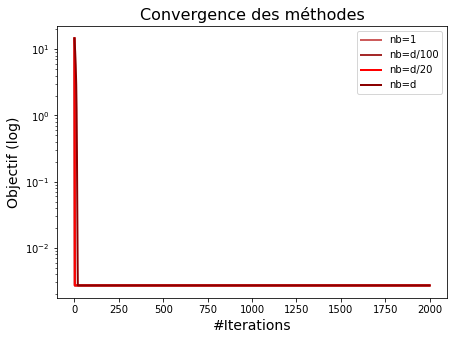

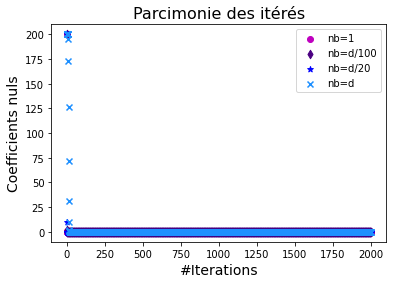

In [4]:
# Script de validation de l'implémentation de la question 10

################# Imports préliminaires
%matplotlib inline

import numpy as np # NumPy (calcul scientifique)
from scipy.linalg import norm # Norme euclidienne
import matplotlib.pyplot as plt # Affichage

############### Etape 1 - Génération des données avec une vérité terrain parcimonieuse
#
# Les coefficients de X suivent une loi normale N(0,1/n)
# Le vecteur y est obtenu via y = X*w+eps, où
#    w est un vecteur creux (10% de coefficients non nuls)
from numpy.random import multivariate_normal, randn

d = 200
n = 200
s = round(0.9*min(d,n))
X = multivariate_normal(np.zeros(d), (1/n)*np.identity(d), size=n)
idx = np.arange(d)

# Coefficients du vrai modèle ("vérité terrain/ground truth")
wtrue = (-1)**idx * np.exp(-idx / 10.)
ip = np.random.permutation(d)
wtrue[ip[0:s]]=0

Xw = X.dot(wtrue)
std = (0.01/n)*(norm(Xw)**2)
noise = std * randn(n)
y = Xw + noise
print(X.shape)
print(y.shape)
w0 = np.ones(d)
lbda = 1/ (n**0.5)

################# Etape 2 - Tester plusieurs valeurs de tailles de bloc


nb=1
nits=2000
w1,obj1,nnz1 = rcd_lasso(w0,X,y,lbda,nb,nits)
print('Nombre de bloc(s) :',nb)
print('Valeur objectif :',obj1[-1])
print('Pourcentage coefficients nuls :',(d-nnz1[-1])*100/d)
nb=int(d/100)
w2,obj2,nnz2 = rcd_lasso(w0,X,y,lbda,nb,nits)
print('Nombre de bloc(s) :',nb)
print('Valeur objectif :',obj2[-1])
print('Pourcentage coefficients nuls :',(d-nnz2[-1])*100/d)
nb=int(d/20)
w3,obj3,nnz3 = rcd_lasso(w0,X,y,lbda,nb,nits)
print('Nombre de bloc(s) :',nb)
print('Valeur objectif :',obj3[-1])
print('Pourcentage coefficients nuls :',(d-nnz3[-1])*100/d)
nb=d
w4,obj4,nnz4 = rcd_lasso(w0,X,y,lbda,nb,nits)
print('Nombre de bloc(s) :',nb)
print('Valeur objectif :',obj4[-1])
print('Pourcentage coefficients nuls :',(d-nnz4[-1])*100/d)

################# Etape 3 - Affichage des résultats



# En termes de fonction objectif (échelle logarithmique sur l'axe des ordonnées)
plt.figure(figsize=(7, 5))
plt.semilogy(obj1, label="nb=1", color='indianred',lw=2)
plt.semilogy(obj2, label="nb=d/100", color='brown', lw=2)
plt.semilogy(obj3, label="nb=d/20", color='red', lw=2)
plt.semilogy(obj4, label="nb=d", color='darkred', lw=2)
plt.title("Convergence des méthodes", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objectif (log)", fontsize=14)
plt.legend()

# Évolution du nombre de coordonnées nulles
plt.figure()
itnum = np.arange(nits+1)
print(itnum.shape)
print(nnz4.shape)
plt.scatter(itnum,nnz1,color='m',marker='o',label='nb=1')
plt.scatter(itnum,nnz2,color='indigo',marker='d',label='nb=d/100')
plt.scatter(itnum,nnz3,color='b',marker='*',label='nb=d/20')
plt.scatter(itnum,nnz4,color='dodgerblue',marker='x',label='nb=d')
plt.title("Parcimonie des itérés", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Coefficients nuls", fontsize=14)
plt.legend()

CC Outils d'optimisation pour les sciences des données et de la décision
 Version 1.0 - *C. W. Royer, janvier 2021.*